### LIBRERIAS

In [57]:
import pandas as pd
import os
import numpy as np

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

## FUNCIONES

In [59]:
def graf_valores_nulos(data_col):
    sns.countplot(data_col.isna())
    sns.set(rc = {'figure.figsize':(15,8)})
    plt.show()
    print(f"Valores No Nulos: {len(data_col)-data_col.isna().sum()}")
    print(f"Valores Nulos: {data_col.isna().sum()}")
    return

## CLIENTE

### Codigo

In [60]:
Cliente= pd.read_csv("C:\\Users\\Nacho\\Downloads\\HENRY\\Proyecto 1\\DS-PI-ProyectoIndividual\\Datasets\\Clientes.csv", on_bad_lines='skip', sep=";")
#Cliente2= pd.read_csv("C:\\Users\\Nacho\\Downloads\\HENRY\\Proyecto 1\\DS-PI-ProyectoIndividual\\Datasets\\Clientes_v2.csv", on_bad_lines='skip', sep=";")
#Cliente= pd.concat([Cliente,Cliente2], axis=0
Cliente

,ID,Provincia,Nombre_y_Apellido,Domicilio,Telefono,Edad,Localidad,X,Y,col10
0,1,Buenos Aires,HEBER JONI SANTANA,LAS HERAS Y BAT. 24 DE FEBRERO 4150 RINCON DE...,42-5161,58,LOMA VERDE,"-58,81850307","-34,30997088",NaN
1,2,Buenos Aires,ANA SAPRIZA,PUEYRREDON Y DUPUY RUTA3 KM 52.500 S/N BÂº LO...,49-7578,61,SANTA ROSA,"-58,73073751","-34,93908311",NaN
2,3,Buenos Aires,FERNANDO LUIS SARALEGUI,CALDERON DE LA BARCA 498,49-3435,15,TORRES,"-59,12794068","-34,43082199",NaN
3,4,Buenos Aires,MANUELA SARASOLA,"RUTA 36 KM 45, 500 S/N EL PELIGRO",49-2883,29,RUTA SOL,"-58,14393954","-34,92052706",NaN
4,5,Buenos Aires,MARIO RAÚL SARASUA,492 Y 186 S/N COLONIA URQUIZA,491-4608,34,JOSE MELCHOR ROMERO,"-58,89381","-34,9444471",NaN
...,...,...,...,...,...,...,...,...,...,...
2379,2668,Córdoba,MARIA STELLA RIVAS,CALLE PUBLICA SANTA ELENA COLONIA TIROLESA - ...,4902756,23,COLONIA TIROLESA,"-64,7419272","-31,25881725",NaN
2380,2669,Córdoba,ANA GABRIELA RIVAS,CALLE PUBLICA S/NÂº LA ARCADIA,153580992,28,LA ARCADIA,"-64,7696886","-31,53338396",NaN
2381,2670,Córdoba,JAVIER ALONSO RIVEIRO,AVENIDA LIBERTADOR SAN MARTIN S/NÂº BOUWER,4993041,57,BOUWER,"-64,19298343","-31,55786125",NaN
2382,2671,Córdoba,JUAN MANUEL RODRIGUEZ,CALLE PUBLICA S/NÂ° EL GATEADO BARRIO EL GATE...,152768918,36,EL GATEADO,"-64,11681227","-31,32123448",NaN


In [61]:
Cliente.info()
Cliente.drop("col10",axis=1, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2384 entries, 0 to 2383
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 2384 non-null   int64  
 1   Provincia          2359 non-null   object 
 2   Nombre_y_Apellido  2365 non-null   object 
 3   Domicilio          2341 non-null   object 
 4   Telefono           2353 non-null   object 
 5   Edad               2384 non-null   int64  
 6   Localidad          2359 non-null   object 
 7   X                  2331 non-null   object 
 8   Y                  2332 non-null   object 
 9   col10              0 non-null      float64
dtypes: float64(1), int64(2), object(7)
memory usage: 186.4+ KB


### Valores Faltantes

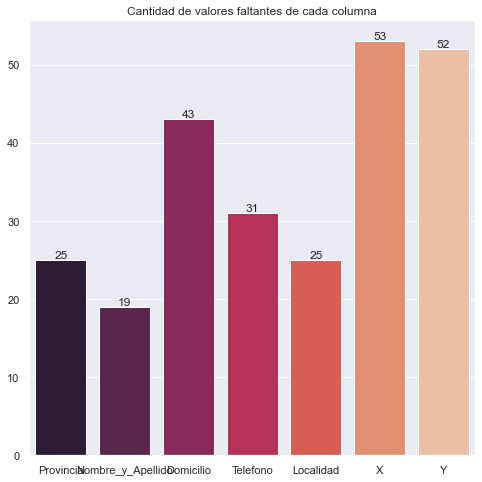

In [62]:
cols_cl = Cliente.columns
na = []
col_cl = []
porcentaje = []
for col in cols_cl:
    if Cliente[col].isna().sum() > 0:
        na.append(Cliente[col].isna().sum())
        col_cl.append(col)

sns.set(rc = {'figure.figsize':(8,8)})
ax=sns.barplot(x=col_cl, y = na, palette='rocket')
ax.set_title('Cantidad de valores faltantes de cada columna')
for i in ax.containers:
        ax.bar_label(i,)

### Moficaciones

In [63]:
Cliente.columns=["ID","Provincia","Nombre_y_Apellido","Domicilio","Telefono","Edad","Localidad","Longitud","Latitud"]

In [64]:
Cliente.set_index("ID", inplace=True)


In [65]:
Cliente["Provincia"].fillna("Sin Dato",inplace=True)
Cliente["Nombre_y_Apellido"].fillna("Sin Dato",inplace=True)
Cliente["Domicilio"].fillna("Sin Dato",inplace=True)
Cliente["Telefono"].fillna("Sin Dato",inplace=True)
Cliente["Localidad"].fillna("Sin Dato",inplace=True)
Cliente["Latitud"].fillna("0.0",inplace=True)
Cliente["Longitud"].fillna("0.0",inplace=True)

In [66]:
for j in [1,2,5]:
    for i in range(len(Cliente)):
        Cliente.iloc[i,j]=Cliente.iloc[i,j].title()

In [67]:
Cliente["Longitud"]=[x.replace(',',".") for x in Cliente["Longitud"]]
Cliente["Latitud"]=[x.replace(',','.') for x in Cliente["Latitud"]]
Cliente["Latitud"]=pd.to_numeric(Cliente["Latitud"],errors="coerce")
Cliente["Longitud"]=pd.to_numeric(Cliente["Longitud"],errors="coerce")
Cliente["Longitud"]=Cliente["Longitud"].astype(float)
Cliente["Latitud"]=Cliente["Latitud"].astype(float)

In [68]:
Q1=Cliente['Longitud'].describe()[4]
Q3=Cliente['Longitud'].describe()[6]
IQR= Q3-Q1
IQR
MIN= Q1-6*IQR
MIN
MAX= Q3+6*IQR
MAX
Cliente[(Cliente['Longitud']>MAX) | (Cliente['Longitud']<MIN)]

,Provincia,Nombre_y_Apellido,Domicilio,Telefono,Edad,Localidad,Longitud,Latitud
ID,,,,,,,,
141,Buenos Aires,Dora Szafir,Sin Dato,4690-6533,19,Rafael Castillo,0.000000,0.000000
156,Buenos Aires,Cecilia Rita Tejera,Sargento Diaz E/ Cordero Y Can 1990 Virreyes,4744-7607,29,Virreyes,0.000000,-34.453914
163,Buenos Aires,Ana Maria Tellechea,G.Posadas E/ Charcas Y Santana 606,4743-1353,57,Beccar,0.000000,-34.464773
175,Buenos Aires,Hermes Romero Toledo,B. De Irigoyen E/ Segurola Y Cazon 2100,4765-4115,64,Boulogne Sur Mer,0.000000,-34.494650
189,Buenos Aires,Sergio Torres,C.Onelli E/ M.Garcia Y Guido 2468,4723-1524,33,Beccar,0.000000,-34.467011
...,...,...,...,...,...,...,...,...
2668,Córdoba,Maria Stella Rivas,Calle Publica Santa Elena Colonia Tirolesa - ...,4902756,23,Colonia Tirolesa,-64.741927,-31.258817
2669,Córdoba,Ana Gabriela Rivas,Calle Publica S/Nâº La Arcadia,153580992,28,La Arcadia,-64.769689,-31.533384
2670,Córdoba,Javier Alonso Riveiro,Avenida Libertador San Martin S/Nâº Bouwer,4993041,57,Bouwer,-64.192983,-31.557861


In [69]:
Cliente["Nueva_Latitud"]=Cliente["Longitud"][(Cliente["Longitud"]>-45) & (Cliente["Longitud"]<-20)]
Cliente["Nueva_Longitud"]=Cliente["Latitud"][Cliente["Latitud"]<-45]
Cliente["Longitud"][(Cliente["Longitud"]>-45) & (Cliente["Longitud"]<-20)]=Cliente["Nueva_Longitud"]
Cliente["Latitud"][Cliente["Latitud"]<-45]=Cliente["Nueva_Latitud"]
Cliente.drop("Nueva_Longitud", axis=1,inplace=True)
Cliente.drop("Nueva_Latitud", axis=1,inplace=True)

C:\Users\Nacho\AppData\Local\Temp/ipykernel_772/2347157013.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cliente["Longitud"][(Cliente["Longitud"]>-45) & (Cliente["Longitud"]<-20)]=Cliente["Nueva_Longitud"]
C:\Users\Nacho\AppData\Local\Temp/ipykernel_772/2347157013.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cliente["Latitud"][Cliente["Latitud"]<-45]=Cliente["Nueva_Latitud"]


### Outliers

<AxesSubplot:xlabel='Edad'>

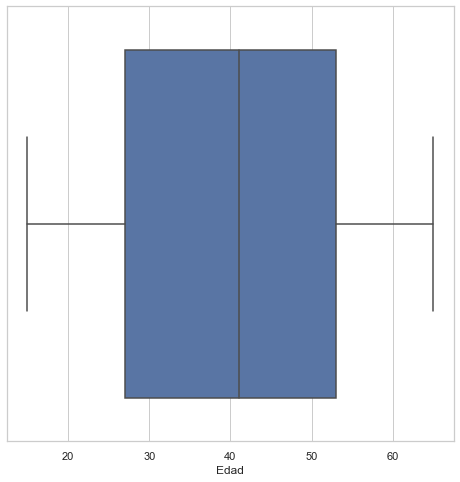

In [70]:
sns.set(rc = {'figure.figsize':(8,8)})
sns.set(style="whitegrid")
sns.boxplot(x =Cliente['Edad'])

<AxesSubplot:xlabel='Latitud'>

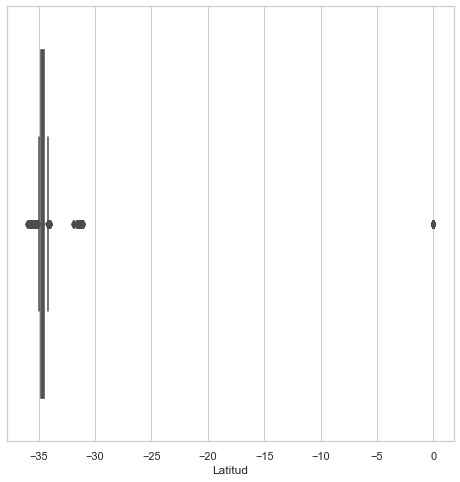

In [71]:
sns.set(rc = {'figure.figsize':(8,8)})
sns.set(style="whitegrid")
sns.boxplot(x =Cliente['Latitud'])

<AxesSubplot:xlabel='Longitud'>

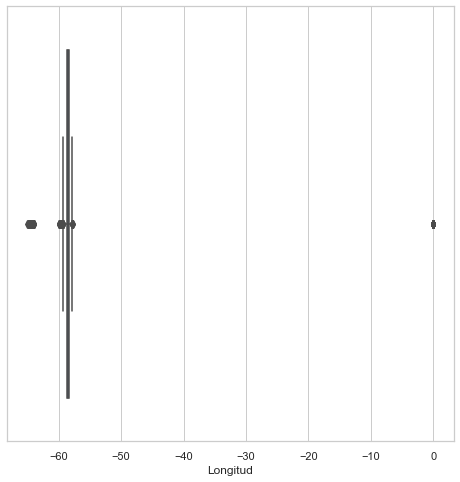

In [72]:
sns.set(rc = {'figure.figsize':(8,8)})
sns.set(style="whitegrid")
sns.boxplot(x =Cliente['Longitud'])

### Conclusion
En estos grafico analizamos los valores faltantes de las columnas de la tabla Cliente. Esta misma posee un aproximamente un 2% de valores nulos. Un porcentaje bajo pero no despreciable a la hora de hacer los analisis correspondientes. 
En el analisis de los valores alejados podemos observar que en Edad, no tenemos valores y podemos apreciar una distribucion bastante uniformde de las edades de los clientes. 

Un tema a tener en cuenta en un futuro a la hora de llenar los datos, sera corrobar que latitud y longitud esten en su lugar correspondiente y no a la inversa. Al hacer el analisis de datos observamos (ademas de cerca de 50 valores nulos por columna) 35 valores de ambas columnas (latitud y longitud) que no parecen corresponder con su posicion en el mapa, parecer estar intercambiados los valores.

## COMPRA

#### Codigo

In [73]:
Compra= pd.read_csv("C:\\Users\\Nacho\\Downloads\\HENRY\\Proyecto 1\\DS-PI-ProyectoIndividual\\Datasets\\Compra.csv")
Compra

,IdCompra,Fecha,Fecha_Año,Fecha_Mes,Fecha_Periodo,IdProducto,Cantidad,Precio,IdProveedor
0,1,1/30/2015,2015,1,201501,42832,13,560.51,12
1,2,1/30/2015,2015,1,201501,42833,11,497.58,7
2,3,1/30/2015,2015,1,201501,42834,1,588.50,6
3,4,1/30/2015,2015,1,201501,42835,9,567.66,14
4,5,1/30/2015,2015,1,201501,42839,14,231.31,2
...,...,...,...,...,...,...,...,...,...
11534,11535,12/25/2020,2020,12,202012,42978,6,88.29,10
11535,11536,12/25/2020,2020,12,202012,42979,2,81.24,10
11536,11537,12/25/2020,2020,12,202012,42980,1,71.67,3
11537,11538,12/25/2020,2020,12,202012,42981,3,35.55,9


In [74]:
Compra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11539 entries, 0 to 11538
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   IdCompra       11539 non-null  int64  
 1   Fecha          11539 non-null  object 
 2   Fecha_Año      11539 non-null  int64  
 3   Fecha_Mes      11539 non-null  int64  
 4   Fecha_Periodo  11539 non-null  int64  
 5   IdProducto     11539 non-null  int64  
 6   Cantidad       11539 non-null  int64  
 7   Precio         11172 non-null  float64
 8   IdProveedor    11539 non-null  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 811.5+ KB


### Valores Faltantes

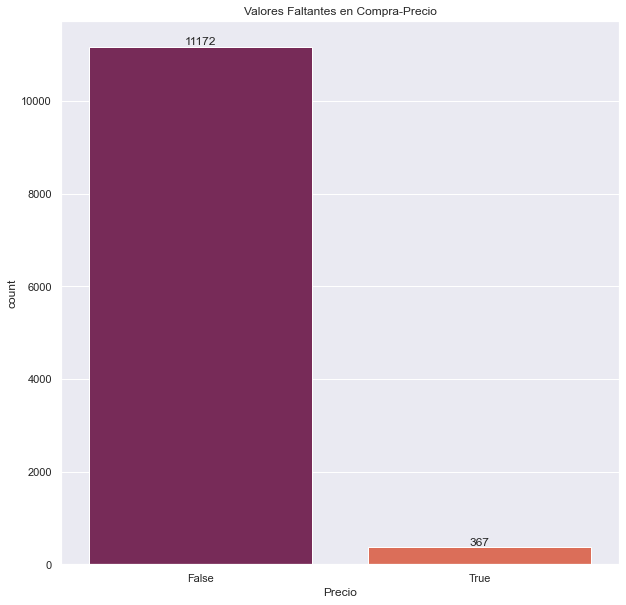

In [75]:
sns.set(rc = {'figure.figsize':(10,10)})
ax=sns.countplot(x=Compra["Precio"].isna(), palette='rocket')
ax.set_title("Valores Faltantes en Compra-Precio")
for i in ax.containers:
        ax.bar_label(i,)

#### Modificaciones

In [76]:
Compra["Precio"].fillna(0.0, inplace=True)

In [77]:
Compra.set_index("IdCompra", inplace=True)
Compra.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11539 entries, 1 to 11539
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Fecha          11539 non-null  object 
 1   Fecha_Año      11539 non-null  int64  
 2   Fecha_Mes      11539 non-null  int64  
 3   Fecha_Periodo  11539 non-null  int64  
 4   IdProducto     11539 non-null  int64  
 5   Cantidad       11539 non-null  int64  
 6   Precio         11539 non-null  float64
 7   IdProveedor    11539 non-null  int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 811.3+ KB


In [78]:
Compra

,Fecha,Fecha_Año,Fecha_Mes,Fecha_Periodo,IdProducto,Cantidad,Precio,IdProveedor
IdCompra,,,,,,,,
1,1/30/2015,2015,1,201501,42832,13,560.51,12
2,1/30/2015,2015,1,201501,42833,11,497.58,7
3,1/30/2015,2015,1,201501,42834,1,588.50,6
4,1/30/2015,2015,1,201501,42835,9,567.66,14
5,1/30/2015,2015,1,201501,42839,14,231.31,2
...,...,...,...,...,...,...,...,...
11535,12/25/2020,2020,12,202012,42978,6,88.29,10
11536,12/25/2020,2020,12,202012,42979,2,81.24,10
11537,12/25/2020,2020,12,202012,42980,1,71.67,3


In [79]:
from datetime import date
Compra['Fecha'] = pd.to_datetime(Compra['Fecha'])

In [80]:
Compra

,Fecha,Fecha_Año,Fecha_Mes,Fecha_Periodo,IdProducto,Cantidad,Precio,IdProveedor
IdCompra,,,,,,,,
1,2015-01-30,2015,1,201501,42832,13,560.51,12
2,2015-01-30,2015,1,201501,42833,11,497.58,7
3,2015-01-30,2015,1,201501,42834,1,588.50,6
4,2015-01-30,2015,1,201501,42835,9,567.66,14
5,2015-01-30,2015,1,201501,42839,14,231.31,2
...,...,...,...,...,...,...,...,...
11535,2020-12-25,2020,12,202012,42978,6,88.29,10
11536,2020-12-25,2020,12,202012,42979,2,81.24,10
11537,2020-12-25,2020,12,202012,42980,1,71.67,3


In [81]:
def outliers(data, columna, valoriqr=1.5):
    Q1=data[columna].describe()[4]
    Q3=data[columna].describe()[6]
    IQR= Q3-Q1
    MIN= Q1-valoriqr*IQR
    MAX= Q3+valoriqr*IQR
    data_sin_outliers=data[(data[columna]<MAX) & (data[columna]>MIN)]
    return data_sin_outliers

### Outliers

<AxesSubplot:xlabel='Cantidad'>

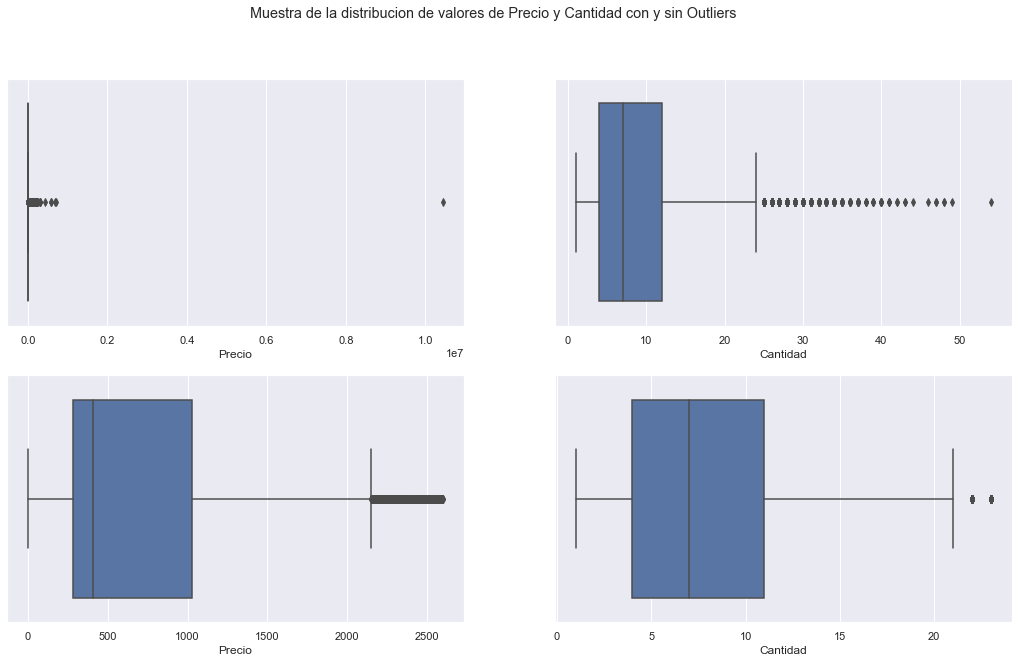

In [82]:
Compra_SO_P=outliers(Compra, "Precio")
Compra_SO_C=outliers(Compra, "Cantidad")

fig, axes = plt.subplots(2, 2, figsize=(18, 10))

fig.suptitle('Muestra de la distribucion de valores de Precio y Cantidad con y sin Outliers')

sns.boxplot(ax=axes[0, 0], data=Compra, x='Precio')
sns.boxplot(ax=axes[0, 1], data=Compra, x='Cantidad')
sns.boxplot(ax=axes[1, 0], data=Compra_SO_P, x='Precio')
sns.boxplot(ax=axes[1, 1], data=Compra_SO_C, x='Cantidad')

### Conclusion
Para la tabla de compras podemos observar que solo una columna posee valores nulos que es la columna Precio (367). Para el desarrollo y analisis de los valores alejados realizo algunas modificacione en el dataset.
    - Reemplazo los valores faltantes de Precio con "0". Para de esta forma no afectar una posible suma total de precio o un total de ventas(Precio*Cantidad)
    - Convierto la columna Fecha a formato de Año-Mes-Dia para simplificar el proceso por si necesita ser migrado a una base de datos.

En la seccion del analisis de outliers aplicamos el metodo del rango interquartil para determinarlos. En el primer grafico se ve este proceso para Precio y Cantidad. Donde observamos por ejemplo en Precio un valor cercano a los $10 millones, cuando los mayores precios no llegan a $200.000. En cantidad a pesar de ser mas estable la distribucion tenemos valores alejados desde cerca de las 25 unidades hasta superar las 50.

Habiendo realiazdo el analisis anterior nos damos cuenta que hemos considerado 666 valores de Precio como outliers y 406 de Cantidad. Considerando un dataset de 11500 estamos dejando afuera casi al 6% de los datos.

## GASTO

### Codigo

In [83]:
Gasto= pd.read_csv("C:\\Users\\Nacho\\Downloads\\HENRY\\Proyecto 1\\DS-PI-ProyectoIndividual\\Datasets\\Gasto.csv")
Gasto

,IdGasto,IdSucursal,IdTipoGasto,Fecha,Monto
0,1,18,1,2015-01-01,1164.90
1,2,18,2,2015-01-01,317.02
2,3,18,3,2015-01-01,118.89
3,4,18,4,2015-01-01,1174.23
4,5,1,1,2015-01-01,1104.51
...,...,...,...,...,...
8635,8636,23,4,2020-12-01,1180.27
8636,8637,24,1,2020-12-01,1152.15
8637,8638,24,2,2020-12-01,305.98
8638,8639,24,3,2020-12-01,104.32


In [84]:
Gasto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8640 entries, 0 to 8639
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   IdGasto      8640 non-null   int64  
 1   IdSucursal   8640 non-null   int64  
 2   IdTipoGasto  8640 non-null   int64  
 3   Fecha        8640 non-null   object 
 4   Monto        8640 non-null   float64
dtypes: float64(1), int64(3), object(1)
memory usage: 337.6+ KB


In [85]:
Gasto["Fecha"]=pd.to_datetime(Gasto["Fecha"])

<AxesSubplot:xlabel='Monto'>

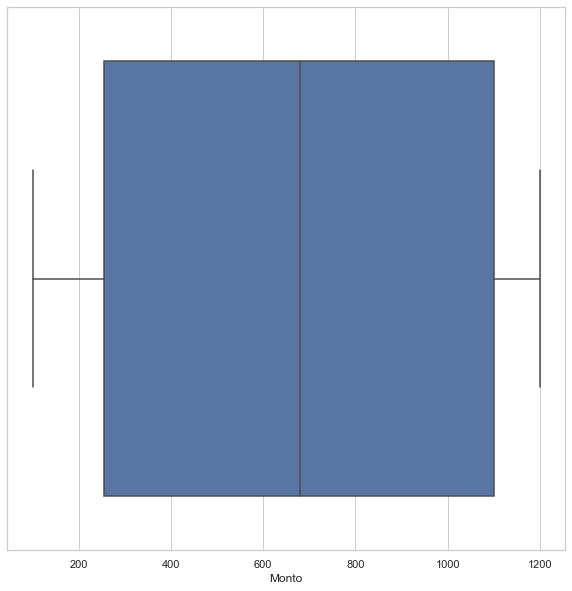

In [86]:
sns.set(rc = {'figure.figsize':(10,10)})
sns.set(style="whitegrid")
sns.boxplot(x =Gasto["Monto"])

### Consclusion

Para la tabla Gasto lo unico que realizamos es la verificacion de los nulos, obteniendo que no hay valores faltantes para esta tabla. Ademas realizamos un analisis de outliers donde confirmamos que tampoco hay outliers y todo los valores estan dentro del rango como muestra el grafico.

## PROVEEDORES

### Codigo

In [87]:
Proveedores= pd.read_csv("C:\\Users\\Nacho\\Downloads\\HENRY\\Proyecto 1\\DS-PI-ProyectoIndividual\\Datasets\\Proveedores.csv", encoding='latin1')
Proveedores

,IDProveedor,Nombre,Address,City,State,Country,departamen
0,1,NaN,BEREGUESTEIN 36,AVELLANEDA,BUENOS AIRES,ARGENTINA,AVELLANEDA
1,2,San Cirano,ALBERTI 965,CORONEL BRANDSEN,BUENOS AIRES,ARGENTINA,BRANDSEN
2,3,Bell S.A.,MORENO 331,CAMPANA,BUENOS AIRES,ARGENTINA,CAMPANA
3,4,Rivero Insumos,PTE. PERON 3872,VALENTIN ALSINA,BUENOS AIRES,ARGENTINA,LANUS
4,5,Laprida Computacion,AVDA. PEDRO PEREYRA 1339,LAPRIDA,BUENOS AIRES,ARGENTINA,LAPRIDA
5,6,Importadora Mann Kloss,LOPE DE VEGA 2102,BOCA DE ATENCION MONTE CASTRO,CABA,ARGENTINA,COMUNA 10
6,7,Fletes y Logistica,SANTA ROSA 1564,CORDOBA,CORDOBA,ARGENTINA,CAPITAL
7,8,NaN,SANTA ROSA 1564,CORDOBA,CORDOBA,ARGENTINA,CAPITAL
8,9,Via Chile Containers,JUAN B. JUSTO 415,MENDOZA,MENDOZA,ARGENTINA,CAPITAL
9,10,Full Toner,CORDOBA 246,MENDOZA,MENDOZA,ARGENTINA,CAPITAL


In [88]:
for j in range(2,7):
    for i in range(len(Proveedores)):
        Proveedores.iloc[i,j]=Proveedores.iloc[i,j].title()

In [89]:
Proveedores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   IDProveedor  14 non-null     int64 
 1   Nombre       12 non-null     object
 2   Address      14 non-null     object
 3   City         14 non-null     object
 4   State        14 non-null     object
 5   Country      14 non-null     object
 6   departamen   14 non-null     object
dtypes: int64(1), object(6)
memory usage: 912.0+ bytes


In [90]:
Proveedores.drop(7, axis=0, inplace=True)

### Valores faltantes

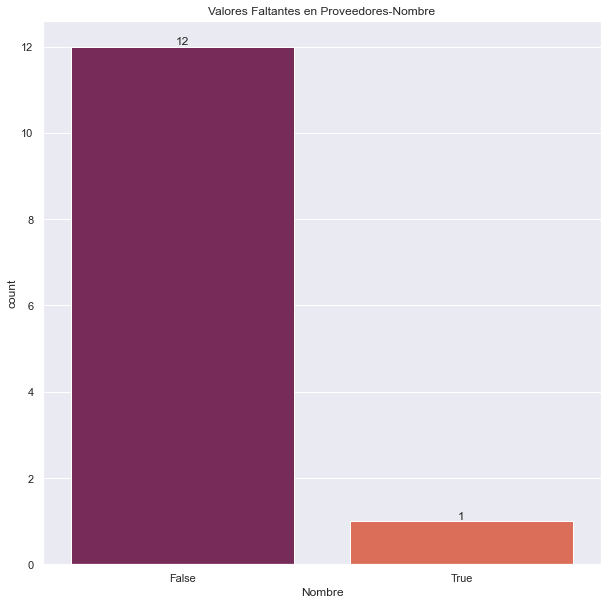

In [91]:
sns.set(rc = {'figure.figsize':(10,10)})
ax=sns.countplot(x=Proveedores["Nombre"].isna(), palette='rocket')
ax.set_title("Valores Faltantes en Proveedores-Nombre")
for i in ax.containers:
        ax.bar_label(i,)

### Conclusion

En la tabla proveedores podemos observar que la mayoria de los datos no son nulos. Salvo 2 valores en la columna de Nombre, donde en un lo reemplazamos por "Sin Nombre" y en la segunda al comparar con los otros datos vemos que se trata de un dato repetido, ya que es un proovedor en la misma provincia, ciudad y direccion que el dato de arriba. Por lo que procedemos a eliminarlo y sugerimos prestar mas atencion a la hora de la ingesta de datos para evitar estos inconvenientes.

## SUCURSALES

### Codigo

In [92]:
Sucursales= pd.read_csv("C:\\Users\\Nacho\\Downloads\\HENRY\\Proyecto 1\\DS-PI-ProyectoIndividual\\Datasets\\Sucursales.csv", sep=";")
Sucursales

,ID,Sucursal,Direccion,Localidad,Provincia,Latitud,Longitud
0,1,Cabildo,Av. Cabildo 1342,Ciudad de Buenos Aires,Ciudad de Buenos Aires,"-34,5678060","-58,4495720"
1,2,Palermo 1,Guatemala 5701,CABA,CABA,"-34,5790350","-58,4335660"
2,3,Palermo 2,Gral. Lucio Norberto Mansilla 2668,CABA,C deBuenos Aires,"-34,5959660","-58,4051500"
3,4,Corrientes,Av. Corrientes 2352,Ciudad de Buenos Aires,Bs As,"-34,6046850","-58,3987640"
4,5,Almagro,Venezuela 3650,Capital,Bs.As.,"-34,6173080","-58,4161790"
5,6,Caballito,Av. Rivadavia 4708,Capital Federal,Ciudad de Buenos Aires,"-34,6163030","-58,4318490"
6,7,Flores,Av. Rivadavia 5746,CapFed,Buenos Aires,"-34,6228680","-58,4464490"
7,8,Alberdi,Av. Juan Bautista Alberdi 1634,Cap. Fed.,Buenos Aires,"-34,6273060","-58,4514980"
8,9,Deposito,Pedernera 530,Cap. Federal,Buenos Aires,"-34,6351340","-58,4615130"
9,10,Velez,Av. Juan Bautista Justo 7738,Cdad de Buenos Aires,Ciudad de Buenos Aires,"-34,6312570","-58,4980630"


In [93]:
Sucursales["Provincia"][Sucursales['Provincia'].str.contains('Ciu')]="CABA"
Sucursales["Provincia"][Sucursales['Provincia'].str.contains('Cap')]="CABA"
Sucursales["Provincia"][Sucursales['Provincia'].str.contains('C de')]="CABA"
Sucursales["Provincia"][Sucursales['Provincia'].str.contains('Prov')]="Buenos Aires"
Sucursales["Provincia"][Sucursales['Provincia'].str.contains('Bs')]="Buenos Aires"
Sucursales["Provincia"][Sucursales['Provincia'].str.contains('Aires')]="Buenos Aires"

C:\Users\Nacho\AppData\Local\Temp/ipykernel_772/1581086244.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sucursales["Provincia"][Sucursales['Provincia'].str.contains('Ciu')]="CABA"
C:\Users\Nacho\AppData\Local\Temp/ipykernel_772/1581086244.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sucursales["Provincia"][Sucursales['Provincia'].str.contains('Cap')]="CABA"
C:\Users\Nacho\AppData\Local\Temp/ipykernel_772/1581086244.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

In [94]:
Sucursales["Provincia"][Sucursales['Localidad'].str.contains('Ciu')]="CABA"
Sucursales["Provincia"][Sucursales['Localidad'].str.contains('Cap')]="CABA"
Sucursales["Provincia"][Sucursales['Localidad'].str.contains('Cdad')]="CABA"

C:\Users\Nacho\AppData\Local\Temp/ipykernel_772/114808938.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sucursales["Provincia"][Sucursales['Localidad'].str.contains('Ciu')]="CABA"
C:\Users\Nacho\AppData\Local\Temp/ipykernel_772/114808938.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sucursales["Provincia"][Sucursales['Localidad'].str.contains('Cap')]="CABA"
C:\Users\Nacho\AppData\Local\Temp/ipykernel_772/114808938.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

In [95]:
Sucursales['Localidad'][Sucursales['Localidad'].str.contains('Ciu')]="CABA"
Sucursales['Localidad'][Sucursales['Localidad'].str.contains('Cap')]="CABA"
Sucursales['Localidad'][Sucursales['Localidad'].str.contains('Cdad')]="CABA"

C:\Users\Nacho\AppData\Local\Temp/ipykernel_772/943303429.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sucursales['Localidad'][Sucursales['Localidad'].str.contains('Ciu')]="CABA"
C:\Users\Nacho\AppData\Local\Temp/ipykernel_772/943303429.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sucursales['Localidad'][Sucursales['Localidad'].str.contains('Cap')]="CABA"
C:\Users\Nacho\AppData\Local\Temp/ipykernel_772/943303429.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

In [96]:
Sucursales["Longitud"]=[x.replace(',',".") for x in Sucursales["Longitud"]]
Sucursales["Latitud"]=[x.replace(',','.') for x in Sucursales["Latitud"]]
Sucursales["Longitud"]=Sucursales["Longitud"].astype(float)
Sucursales["Latitud"]=Sucursales["Latitud"].astype(float)

In [97]:
Sucursales.set_index("ID",inplace=True)
Sucursales

,Sucursal,Direccion,Localidad,Provincia,Latitud,Longitud
ID,,,,,,
1,Cabildo,Av. Cabildo 1342,CABA,CABA,-34.567806,-58.449572
2,Palermo 1,Guatemala 5701,CABA,CABA,-34.579035,-58.433566
3,Palermo 2,Gral. Lucio Norberto Mansilla 2668,CABA,CABA,-34.595966,-58.405150
4,Corrientes,Av. Corrientes 2352,CABA,CABA,-34.604685,-58.398764
5,Almagro,Venezuela 3650,CABA,CABA,-34.617308,-58.416179
6,Caballito,Av. Rivadavia 4708,CABA,CABA,-34.616303,-58.431849
7,Flores,Av. Rivadavia 5746,CABA,CABA,-34.622868,-58.446449
8,Alberdi,Av. Juan Bautista Alberdi 1634,CABA,CABA,-34.627306,-58.451498
9,Deposito,Pedernera 530,CABA,CABA,-34.635134,-58.461513


### Outliers

<AxesSubplot:xlabel='Latitud'>

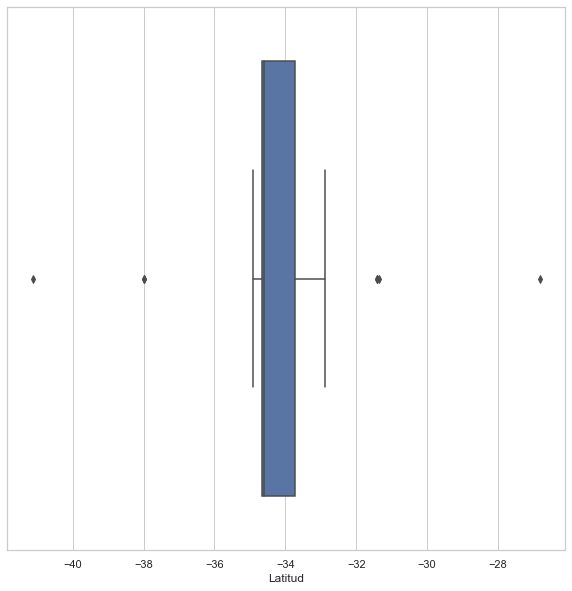

In [98]:
sns.set(rc = {'figure.figsize':(10,10)})
sns.set(style="whitegrid")
sns.boxplot(x =Sucursales["Latitud"])

<AxesSubplot:xlabel='Longitud'>

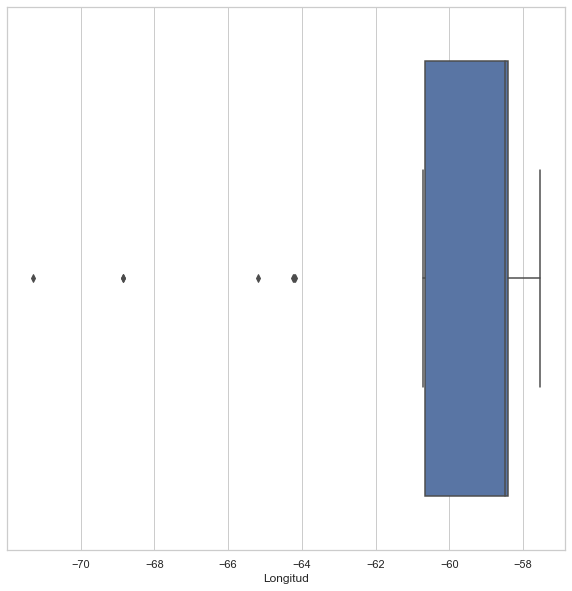

In [99]:
sns.set(rc = {'figure.figsize':(10,10)})
sns.set(style="whitegrid")
sns.boxplot(x =Sucursales["Longitud"])

### Conclusion

Para la tabla Sucursales analizamos previamente los valores faltantes, notando que todos los valores estan insertados. Realizamos algunas modificaciones al dataset para normalizar columnas de Provincia y Localidad.
Ademas verificamos posibles valores alejados o erronos en las columnas de Latitud y Longitud, obteniendo un resultado negativo. Todos los valores estan correctos.

## VENTA

### Codigo

In [100]:
Venta= pd.read_csv("C:\\Users\\Nacho\\Downloads\\HENRY\\Proyecto 1\\DS-PI-ProyectoIndividual\\Datasets\\Venta.csv")
Venta

,IdVenta,Fecha,Fecha_Entrega,IdCanal,IdCliente,IdSucursal,IdEmpleado,IdProducto,Precio,Cantidad
0,1,2018-03-09,2018-03-17,3,969,13,1674,42817,813.12,2.0
1,2,2018-12-28,2018-12-29,2,884,13,1674,42795,543.18,3.0
2,3,2016-03-28,2016-03-31,2,1722,13,1674,42837,430.32,1.0
3,4,2017-10-23,2017-10-24,3,2876,13,1674,42834,818.84,2.0
4,5,2017-11-22,2017-11-25,2,678,13,1674,42825,554.18,3.0
...,...,...,...,...,...,...,...,...,...,...
46175,47596,2020-11-30,2020-12-09,1,193,26,3032,42850,279.00,2.0
46176,47597,2020-11-30,2020-12-07,3,333,26,3193,42799,1536.04,2.0
46177,47598,2020-11-30,2020-12-07,1,2389,27,3667,42916,1356.00,2.0
46178,47599,2020-11-30,2020-12-04,1,1067,29,3836,42935,2456.00,1.0


In [101]:
Venta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46180 entries, 0 to 46179
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   IdVenta        46180 non-null  int64  
 1   Fecha          46180 non-null  object 
 2   Fecha_Entrega  46180 non-null  object 
 3   IdCanal        46180 non-null  int64  
 4   IdCliente      46180 non-null  int64  
 5   IdSucursal     46180 non-null  int64  
 6   IdEmpleado     46180 non-null  int64  
 7   IdProducto     46180 non-null  int64  
 8   Precio         45260 non-null  float64
 9   Cantidad       45296 non-null  float64
dtypes: float64(2), int64(6), object(2)
memory usage: 3.5+ MB


### Valores Faltantes

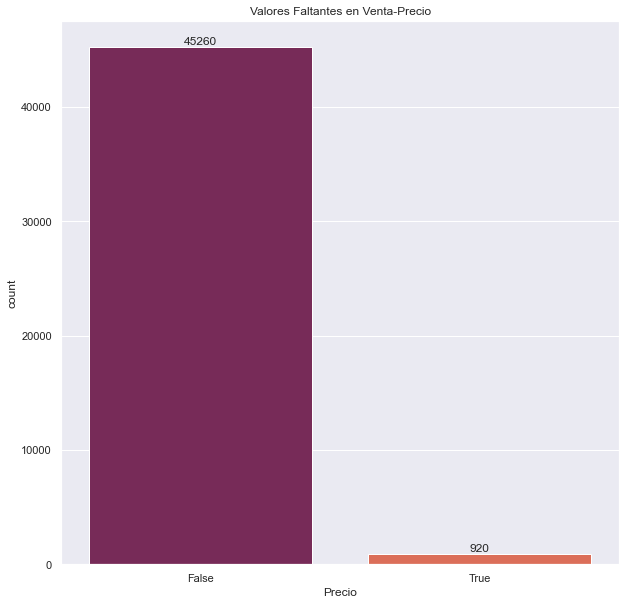

In [102]:
sns.set(rc = {'figure.figsize':(10,10)})
ax=sns.countplot(x=Venta["Precio"].isna(), palette='rocket')
ax.set_title("Valores Faltantes en Venta-Precio")
for i in ax.containers:
        ax.bar_label(i,)

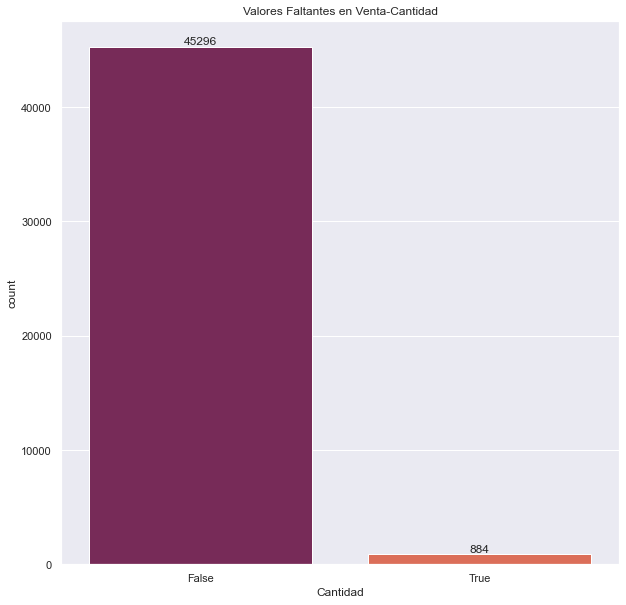

In [103]:
sns.set(rc = {'figure.figsize':(10,10)})
ax=sns.countplot(x=Venta["Cantidad"].isna(), palette='rocket')
ax.set_title("Valores Faltantes en Venta-Cantidad")
for i in ax.containers:
        ax.bar_label(i,)

### Codigo

In [104]:
Venta["Precio"][Venta["Precio"].isna()]=0
Venta["Cantidad"][Venta["Cantidad"].isna()]=1

C:\Users\Nacho\AppData\Local\Temp/ipykernel_772/4189217840.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Venta["Precio"][Venta["Precio"].isna()]=0
C:\Users\Nacho\AppData\Local\Temp/ipykernel_772/4189217840.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Venta["Cantidad"][Venta["Cantidad"].isna()]=1


### Outliers

<AxesSubplot:xlabel='Cantidad', ylabel='count'>

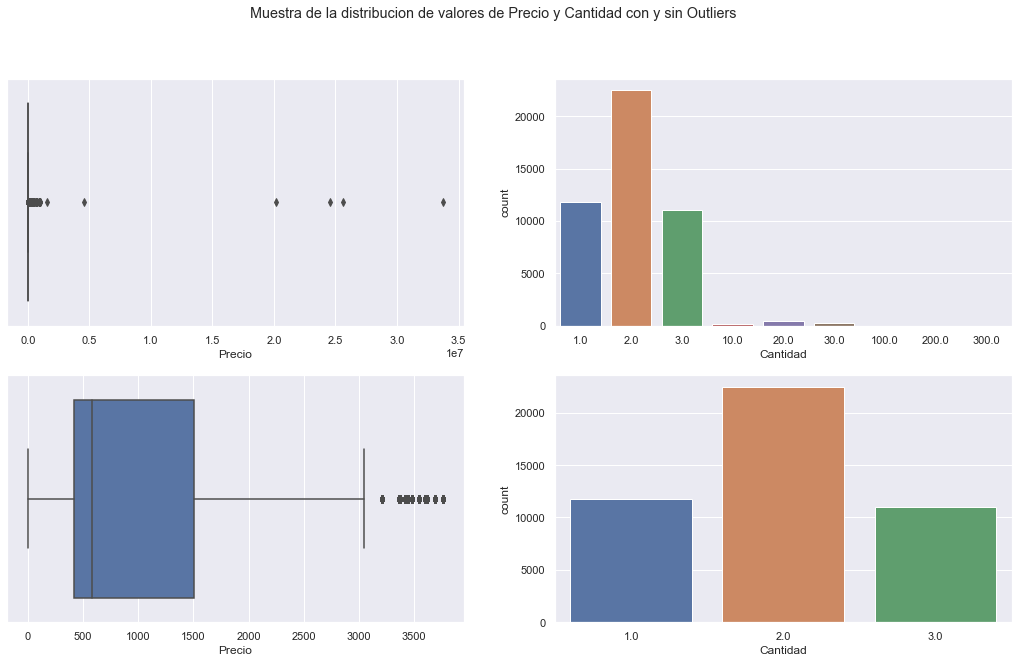

In [105]:
Venta_SO_P=outliers(Venta, "Precio")
Venta_SO_C=outliers(Venta, "Cantidad")

fig, axes = plt.subplots(2, 2, figsize=(18, 10))

fig.suptitle('Muestra de la distribucion de valores de Precio y Cantidad con y sin Outliers')

sns.boxplot(ax=axes[0, 0], data=Venta, x='Precio')
sns.countplot(ax=axes[0, 1], data=Venta, x='Cantidad')
sns.boxplot(ax=axes[1, 0], data=Venta_SO_P, x='Precio')
sns.countplot(ax=axes[1, 1], data=Venta_SO_C, x='Cantidad')

In [106]:
len(Venta)-len(Venta_SO_P)

2476

In [107]:
len(Venta)-len(Venta_SO_C)

910

<AxesSubplot:xlabel='Cantidad', ylabel='count'>

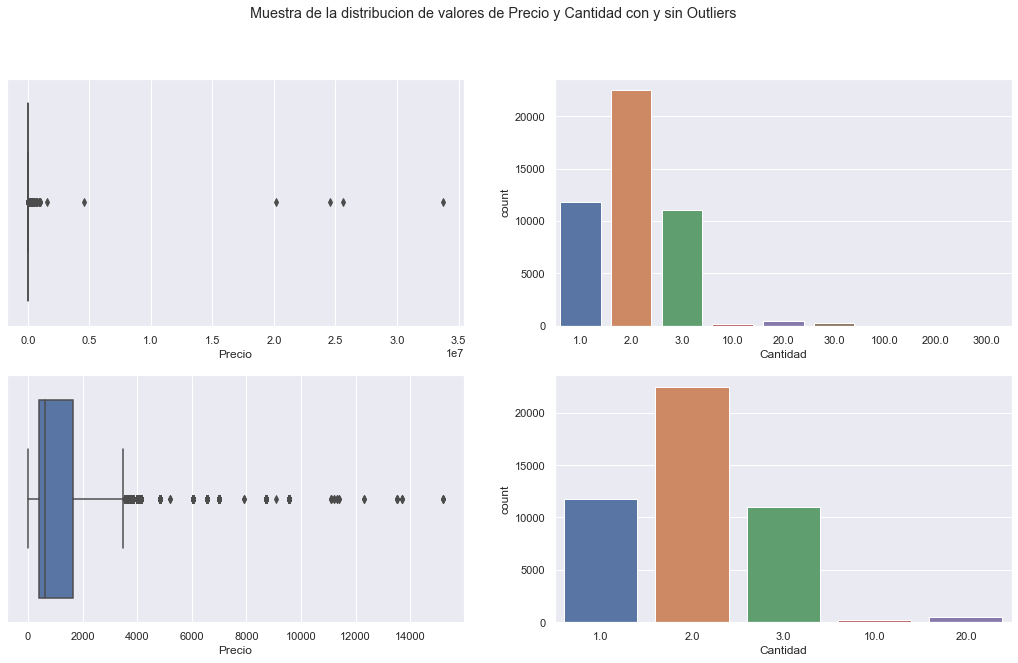

In [108]:
Venta_SO_P=outliers(Venta, "Precio",10)
Venta_SO_C=outliers(Venta, "Cantidad",10)

fig, axes = plt.subplots(2, 2, figsize=(18, 10))

fig.suptitle('Muestra de la distribucion de valores de Precio y Cantidad con y sin Outliers')

sns.boxplot(ax=axes[0, 0], data=Venta, x='Precio')
sns.countplot(ax=axes[0, 1], data=Venta, x='Cantidad')
sns.boxplot(ax=axes[1, 0], data=Venta_SO_P, x='Precio')
sns.countplot(ax=axes[1, 1], data=Venta_SO_C, x='Cantidad')

### Conclusion

Analizando la tabla Ventas observamos que las columnas Precio y Cantidad poseen valores nulos (924 y 892) que son aproximadamente el 2% del dataset. 
Para poder realizar un buen analisis de valores alejados completamos esos valores faltantes con $0 en Precio y 1 en Cantidad (Estos valores son elejidos de forma tal que si se desea calcular las ventas totales, estos valores no afecten el restultado)

Para el analisis de outliers realizamos la grafica de arriba donde vemos la distribucion de datos con y sin outliers (los outliers fueron calculados utilizando el rango interquartil). 
Al realizar esto descbrimos nuestro primer inconveniente. En la columna de Precio observamos que el maximo valor sin outliers es $3500 mientras que en la tabla con outliers esta cerca de los $35 millones. Ademas en la columan cantidad solo nos quedan 3 valores [1,2,3]. Muy poco represntativo considerando que hay ventas de 300 unidades. Por lo tanto pasamos a moficiar la funcion para encontrar los min y max. En este caso utilizaremos 10 x IQR en lugar de 1.5 x IQR.

De esta forma aunque obtenemos graficos mucho mas centratlizados en una parte, tanbien obtenemos un mejor rango de valores por donde se puede mover el precio y la cantidad.

## ANALISIS

### Graficos

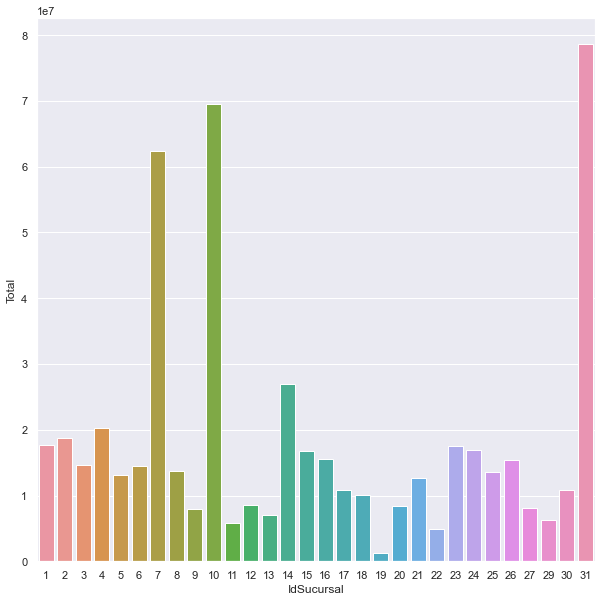

In [109]:
Venta["Total"]=Venta["Precio"]*Venta["Cantidad"]
masvendidos=Venta.groupby(["IdSucursal"]).sum()
sns.set(rc = {'figure.figsize':(10,10)})
ax=sns.barplot(x = masvendidos.index, y = 'Total', data = masvendidos)

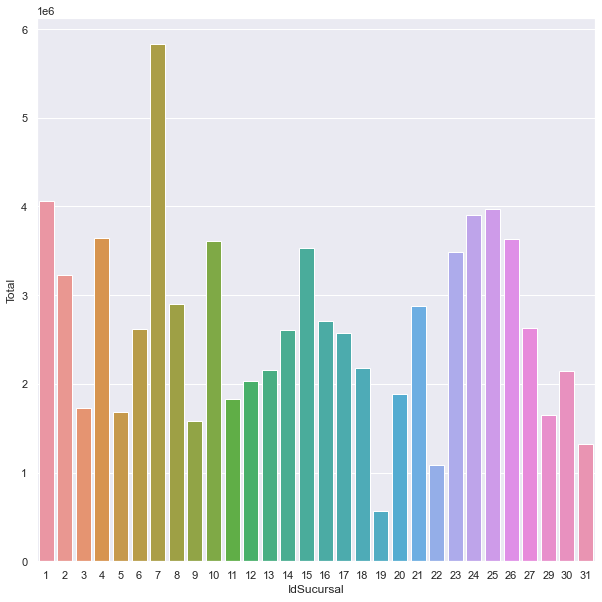

In [110]:
Venta["Total"]=Venta["Precio"]*Venta["Cantidad"]
Venta_SO= outliers(Venta, "Total")
masvendidos=Venta_SO.groupby(["IdSucursal"]).sum()
sns.set(rc = {'figure.figsize':(10,10)})
ax=sns.barplot(x = masvendidos.index, y = 'Total', data = masvendidos)

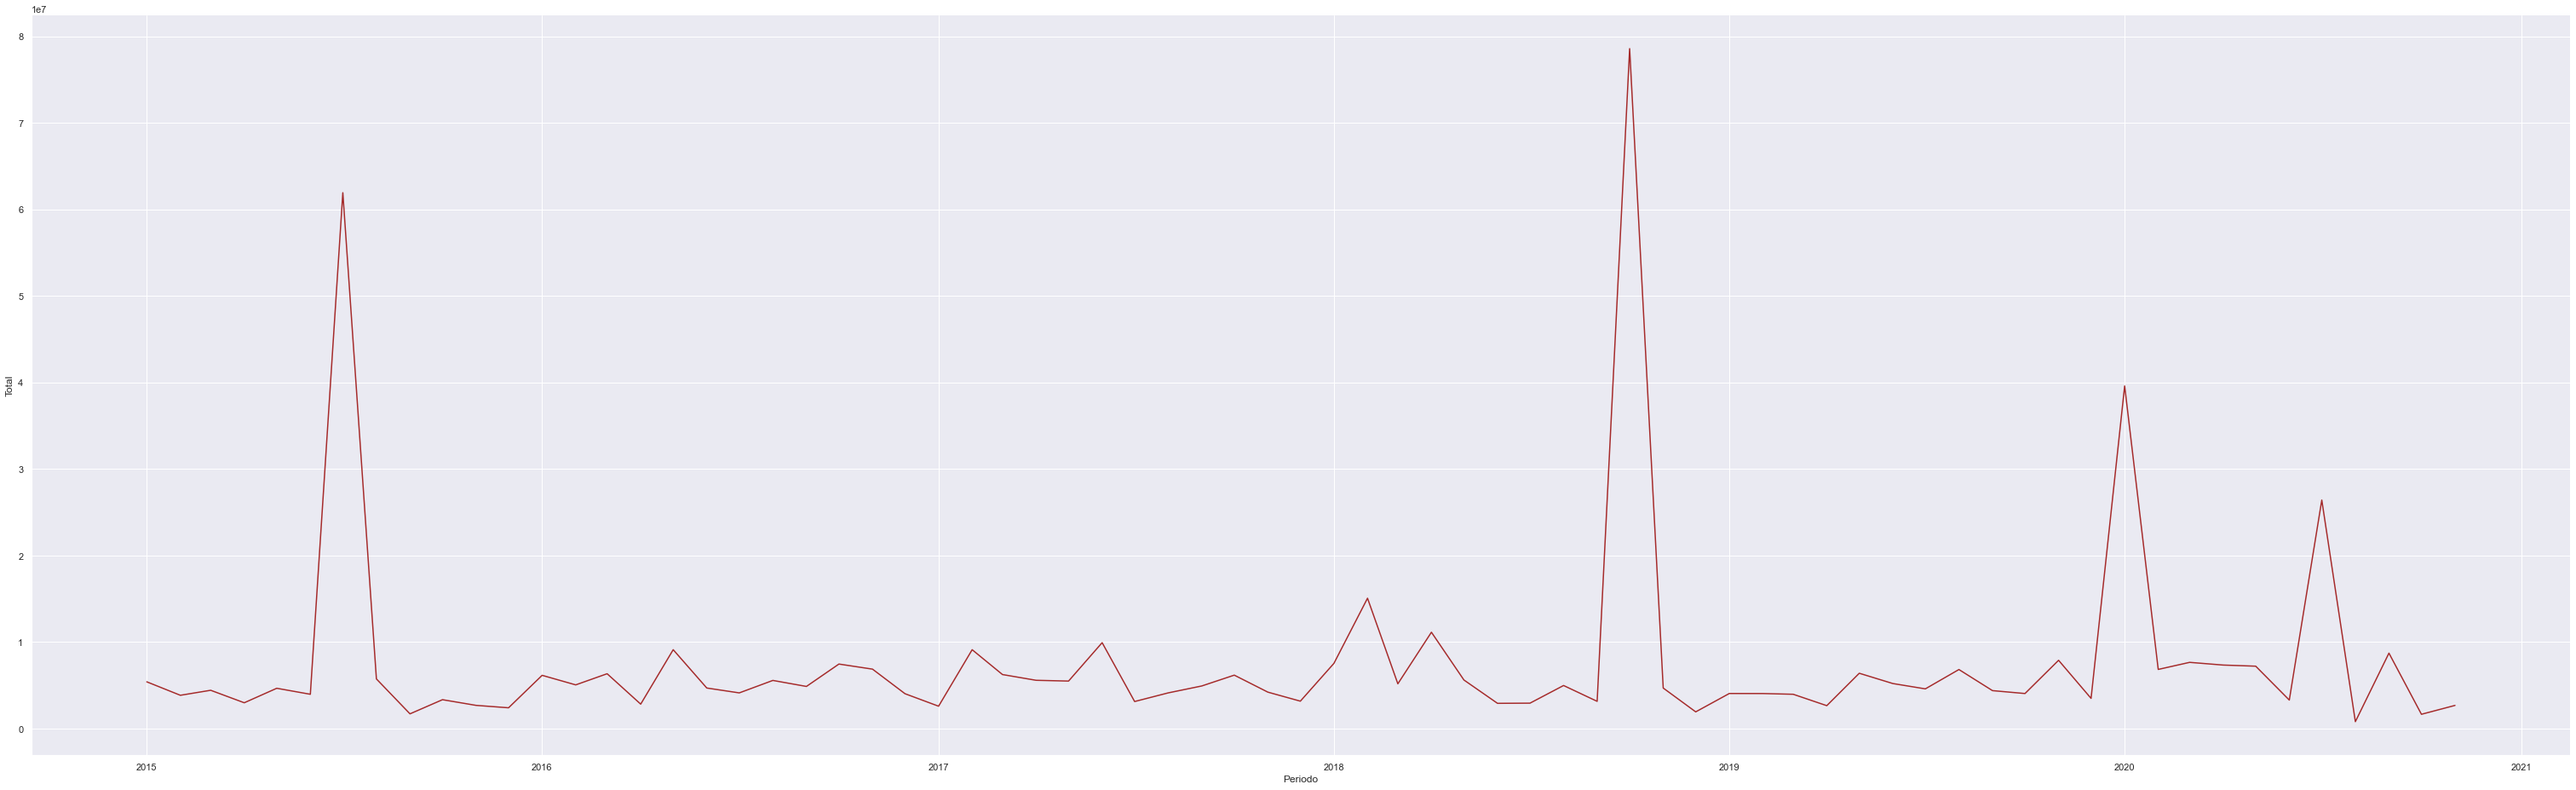

In [111]:
Venta["Periodo"]=pd.to_datetime(Venta['Fecha']).dt.year.astype(str) + "-" + pd.to_datetime(Venta['Fecha']).dt.month.astype(str)
Venta["Periodo"]=pd.to_datetime(Venta["Periodo"])
masVenta=Venta.groupby(["Periodo"]).sum()
sns.relplot(x = masVenta.index, y = 'Total', data = masVenta, color = 'Brown', kind="line")
plt.gcf().set_size_inches(50,15)

<AxesSubplot:xlabel='Fecha_Periodo', ylabel='Total'>

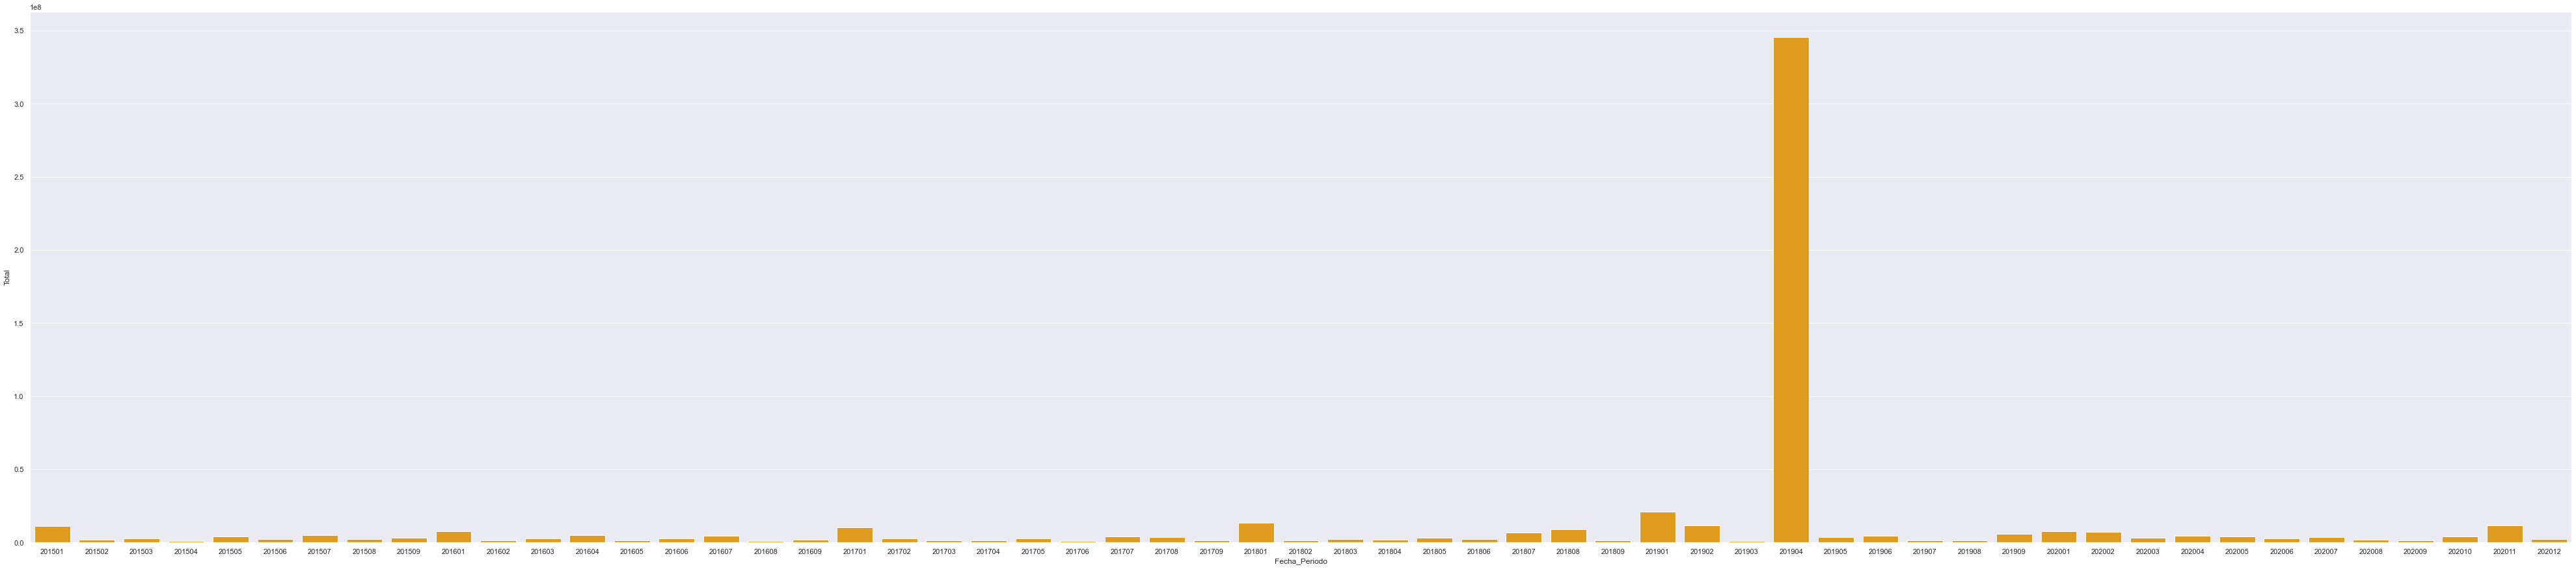

In [112]:
Compra["Total"]=Compra["Precio"]*Compra["Cantidad"]
mascompras_año=Compra.groupby(["Fecha_Periodo"]).sum()
sns.set(rc = {'figure.figsize':(70,15)})
sns.barplot(x = mascompras_año.index, y = 'Total', data = mascompras_año, color = 'orange')

C:\Users\Nacho\AppData\Local\Temp/ipykernel_772/1538255961.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Compra_SO_P["Total"]=Compra_SO_P["Precio"]*Compra_SO_P["Cantidad"]


<AxesSubplot:xlabel='Fecha_Periodo', ylabel='Total'>

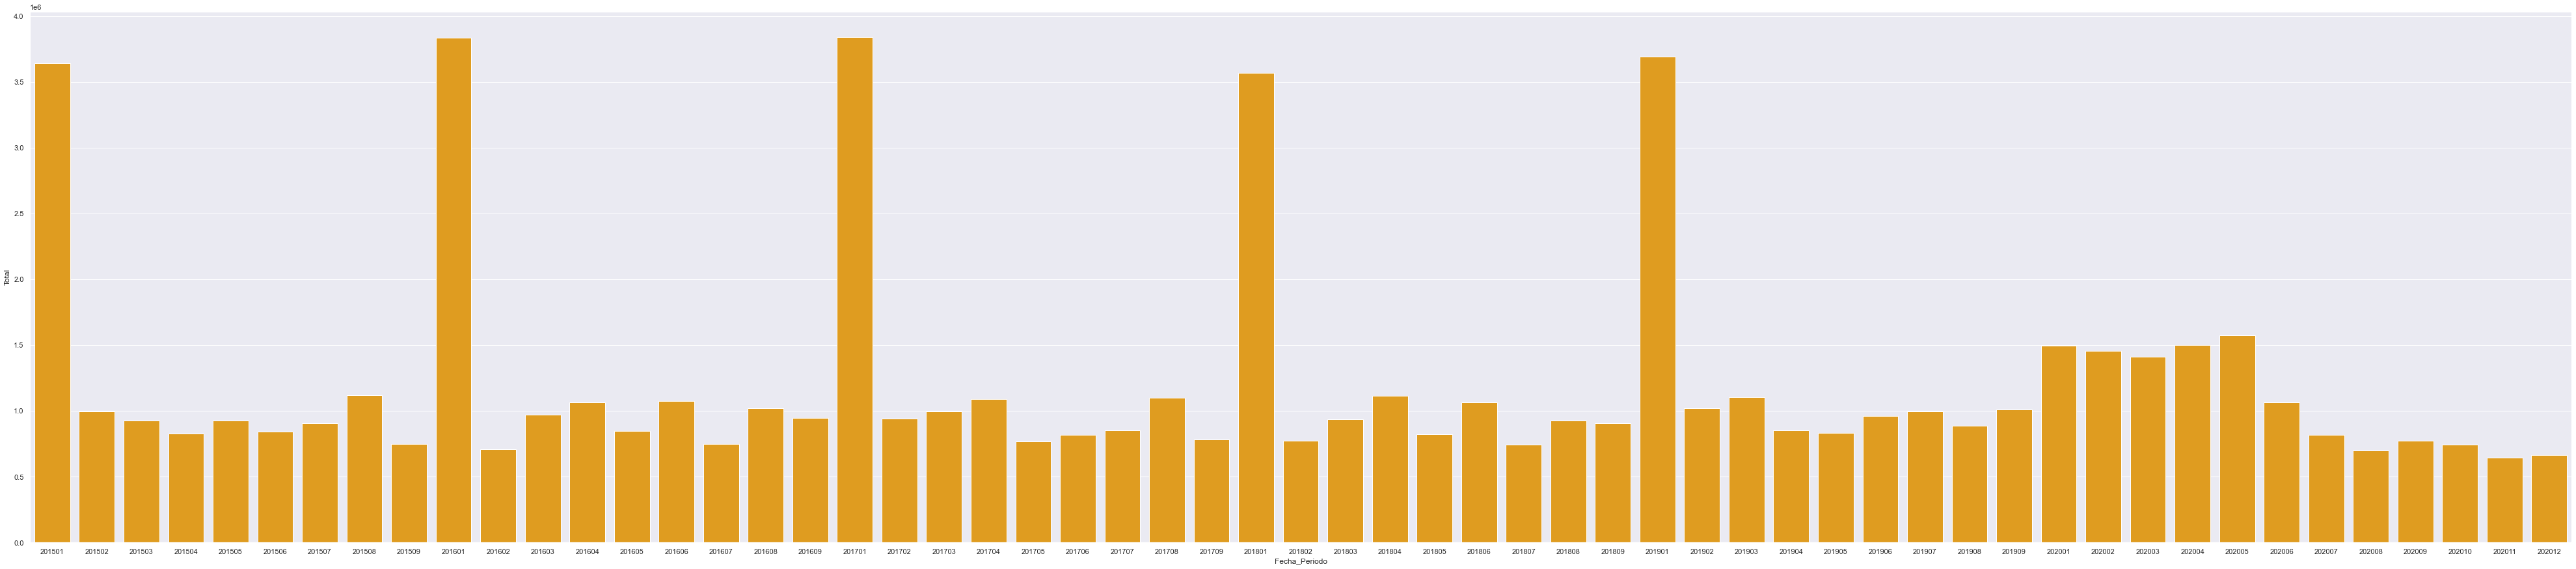

In [113]:
Compra_SO_P["Total"]=Compra_SO_P["Precio"]*Compra_SO_P["Cantidad"]
mascompras_año=Compra_SO_P.groupby(["Fecha_Periodo"]).sum()
sns.set(rc = {'figure.figsize':(70,15)})
sns.barplot(x = mascompras_año.index, y = 'Total', data = mascompras_año, color = 'orange')

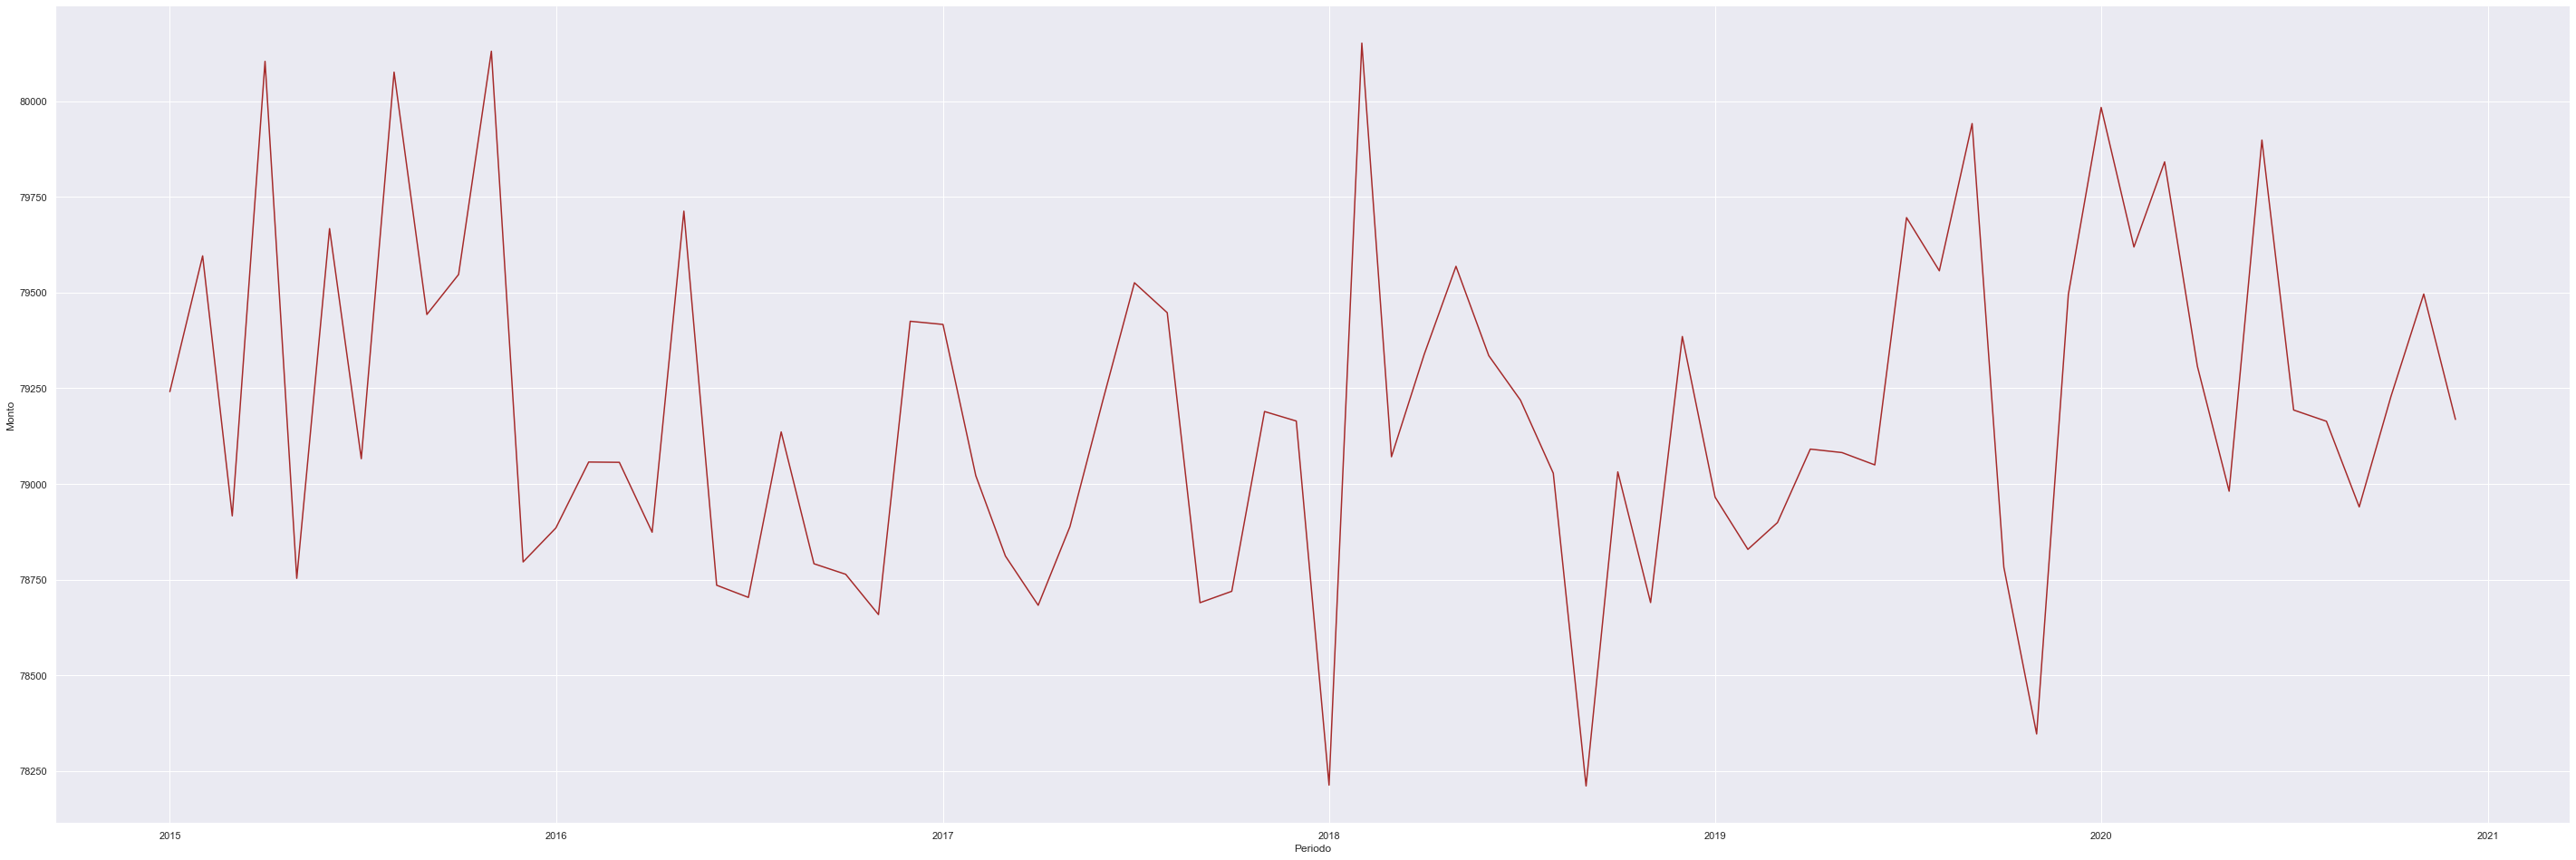

In [114]:
Gasto["Periodo"]=Gasto['Fecha'].dt.year.astype(str) + "-" + Gasto['Fecha'].dt.month.astype(str)
Gasto["Periodo"]=pd.to_datetime(Gasto["Periodo"])
masgasto=Gasto.groupby(["Periodo"]).sum()
sns.relplot(x = masgasto.index, y = 'Monto', data = masgasto, color = 'Brown', kind="line")
plt.gcf().set_size_inches(50,15)

### Conclusion
Analizando las tabalas de Venta, Compra, Gasto. Recomendamos poner una nueva sucursal en la Provincia de Rio Negro mas especificamente en la ciudad de Bariloche, el motivo es el analisis de las ventas totales en esa sucursal es muy superior a las demas sucursales en el analisis con outliers. Analizando sin los outliers observamos que la sede de Flores en Bs. As. es la que mas vende respecto a las demas.
Observando las graficas de Venta, Compra y Gasto a lo largo del tiempo, podemos ver grandes crecimientos y reducciones en 2018. Principalmente en la tabla de Ventas-Compras cuando nos acercamos a fin de año y a la epoca de fiestas.


### KPI'S


Text(0.5, 1.0, 'Margen de ganancia por Producto (Margenes superiores al 100%)')

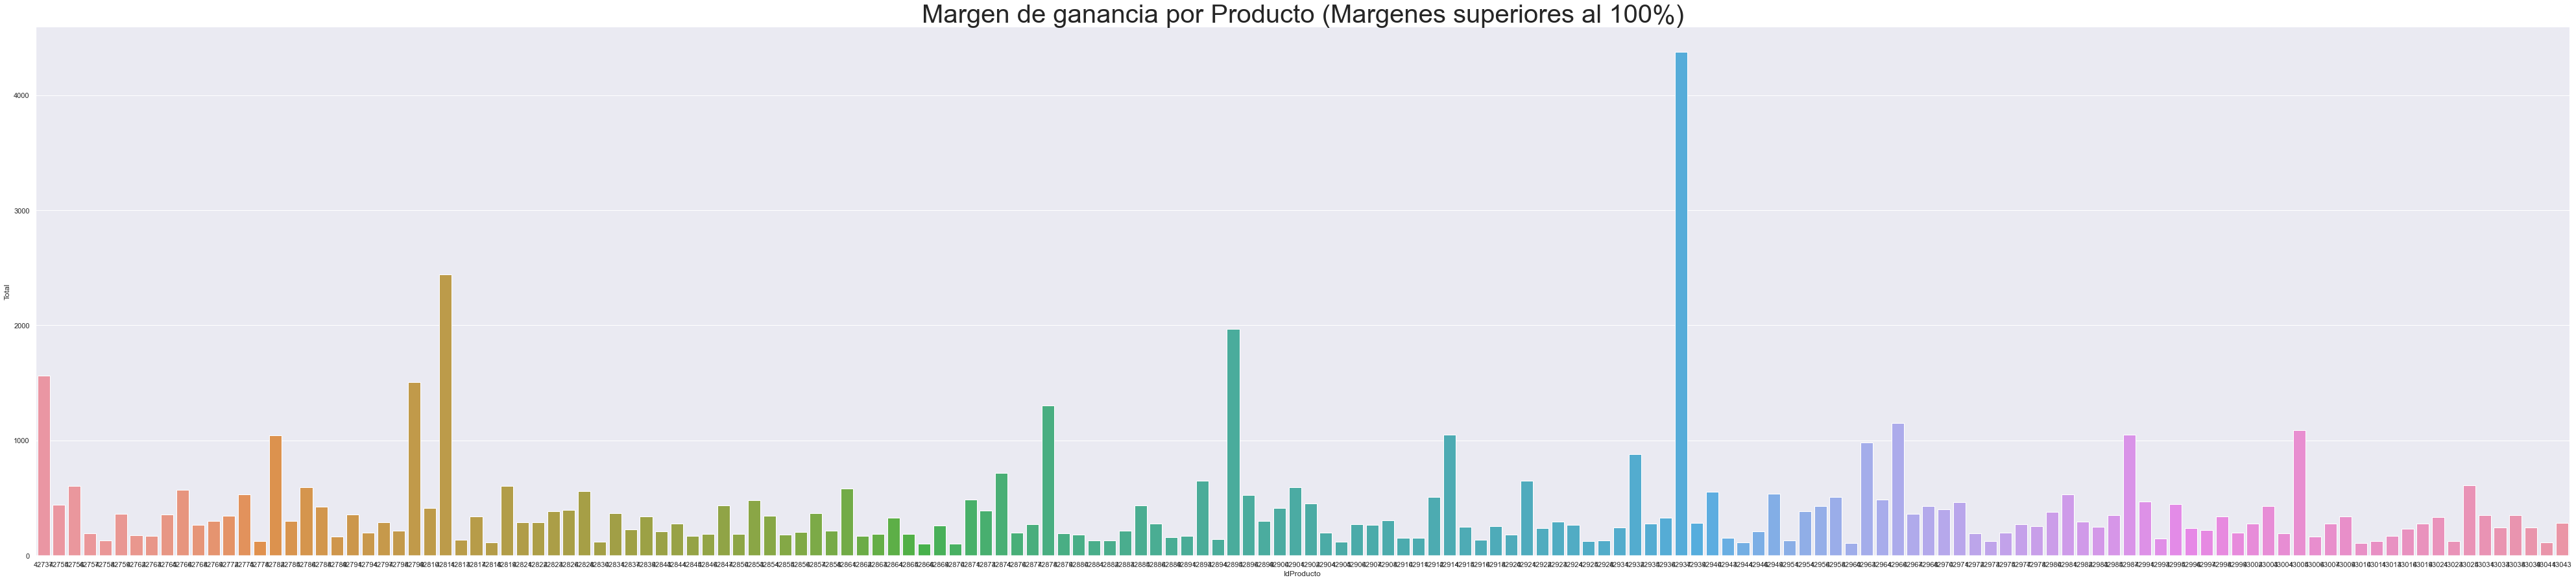

In [115]:
Margen=(((Venta.groupby(["IdProducto"]).sum())/(Compra.groupby(["IdProducto"]).sum())-1)*100)
Margen_20=Margen[Margen["Total"]>100].sort_values(by="Total",ascending=False)
sns.set(rc = {'figure.figsize':(70,15)})
sns.barplot(x = Margen_20.index, y = 'Total', data = Margen_20).set_title("Margen de ganancia por Producto (Margenes superiores al 100%)", fontsize=40)

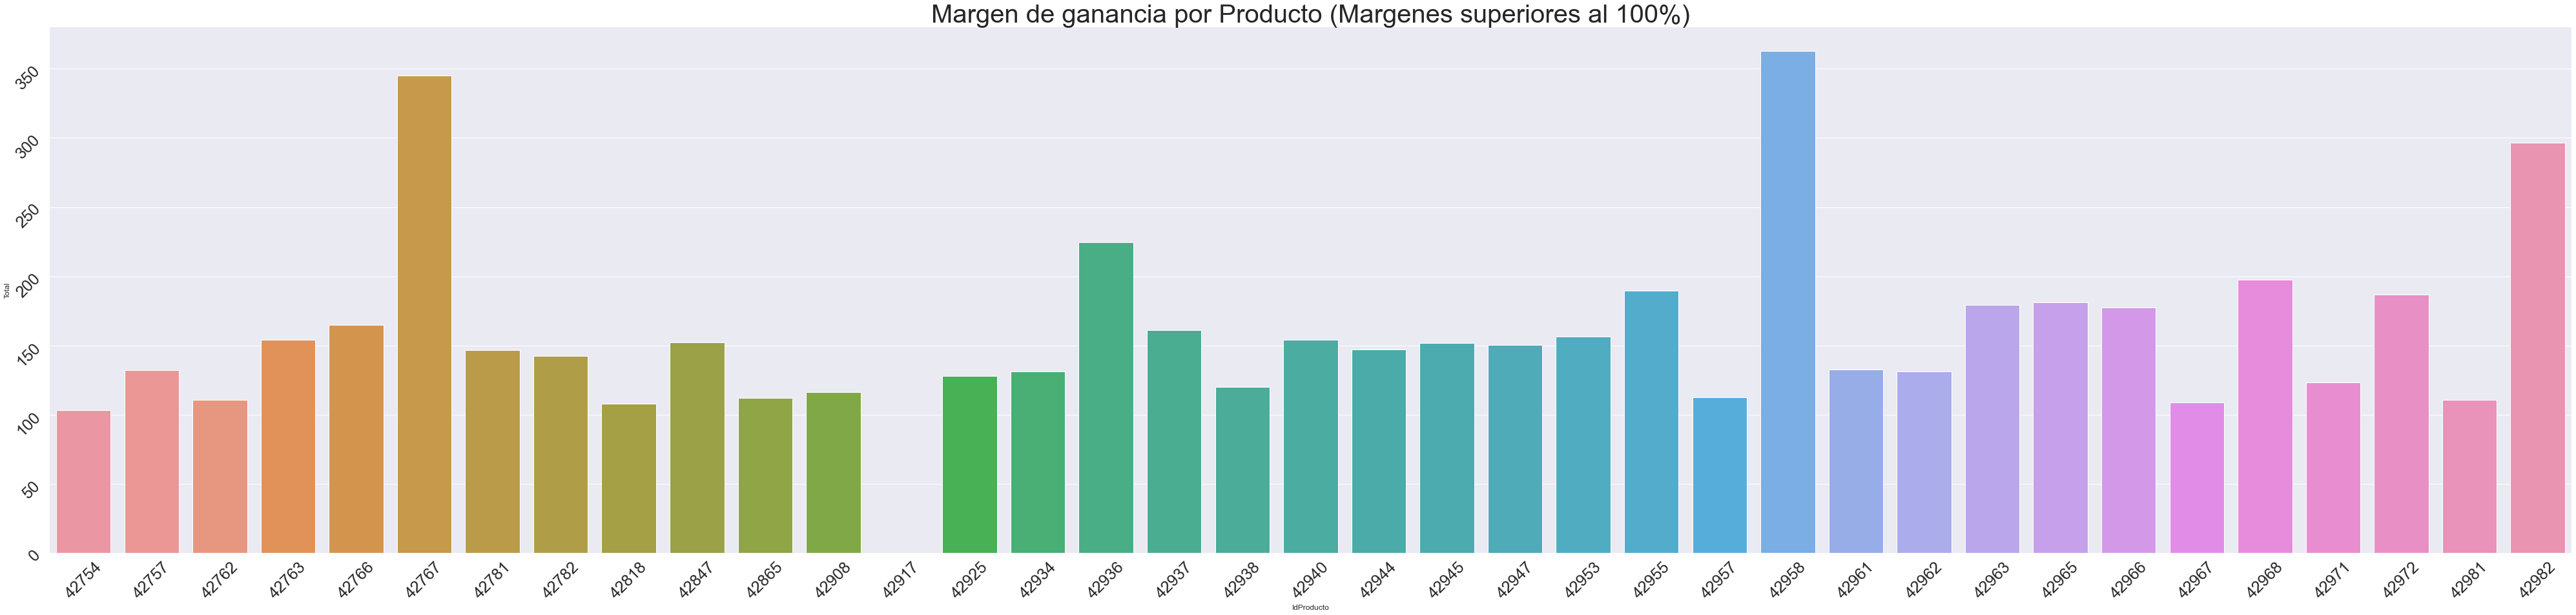

In [116]:
Compra_SO= outliers(Compra, "Total")
Venta_SO= outliers(Venta, "Total")

Margen_SO=(((Venta_SO.groupby(["IdProducto"]).sum())/(Compra_SO.groupby(["IdProducto"]).sum())-1)*100)
Margen_20_SO=Margen_SO[Margen_SO["Total"]>100].sort_values(by="Total",ascending=False)

sns.set(rc = {'figure.figsize':(70,15)})
sns.barplot(x = Margen_20_SO.sort_values(by="Total",ascending=False).index, y = 'Total', data = Margen_20_SO.sort_values(by="Total",ascending=False)).set_title("Margen de ganancia por Producto (Margenes superiores al 100%)", fontsize=40)
plt.xticks(fontsize=25, rotation=45)
plt.yticks(fontsize=25, rotation=45)
plt.show()

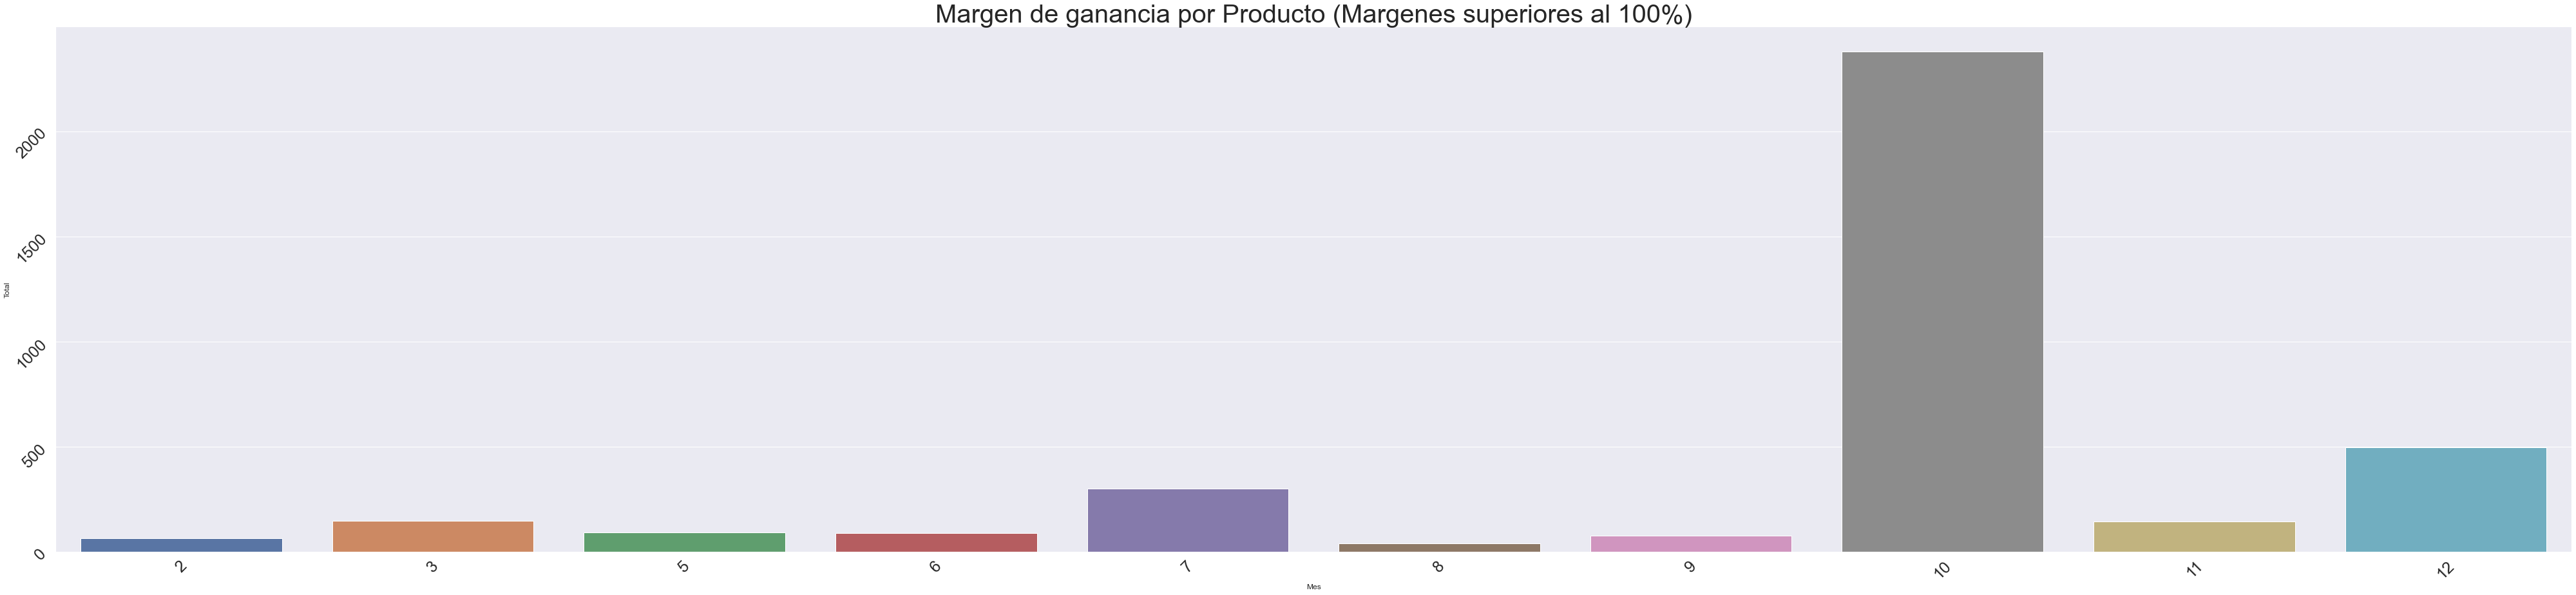

In [117]:
Venta["Mes"]=pd.DatetimeIndex(Venta['Fecha']).month
Margen=(((Venta.groupby(["Mes"]).sum())/(Compra.groupby(["Fecha_Mes"]).sum())-1)*100)
Margen_20=Margen[Margen["Total"]>20].sort_values(by="Total",ascending=False)
sns.set(rc = {'figure.figsize':(70,15)})
sns.barplot(x = Margen_20.index, y = 'Total', data = Margen_20).set_title("Margen de ganancia por Producto (Margenes superiores al 100%)", fontsize=40)
plt.xticks(fontsize=25, rotation=45)
plt.yticks(fontsize=25, rotation=45)
plt.show()

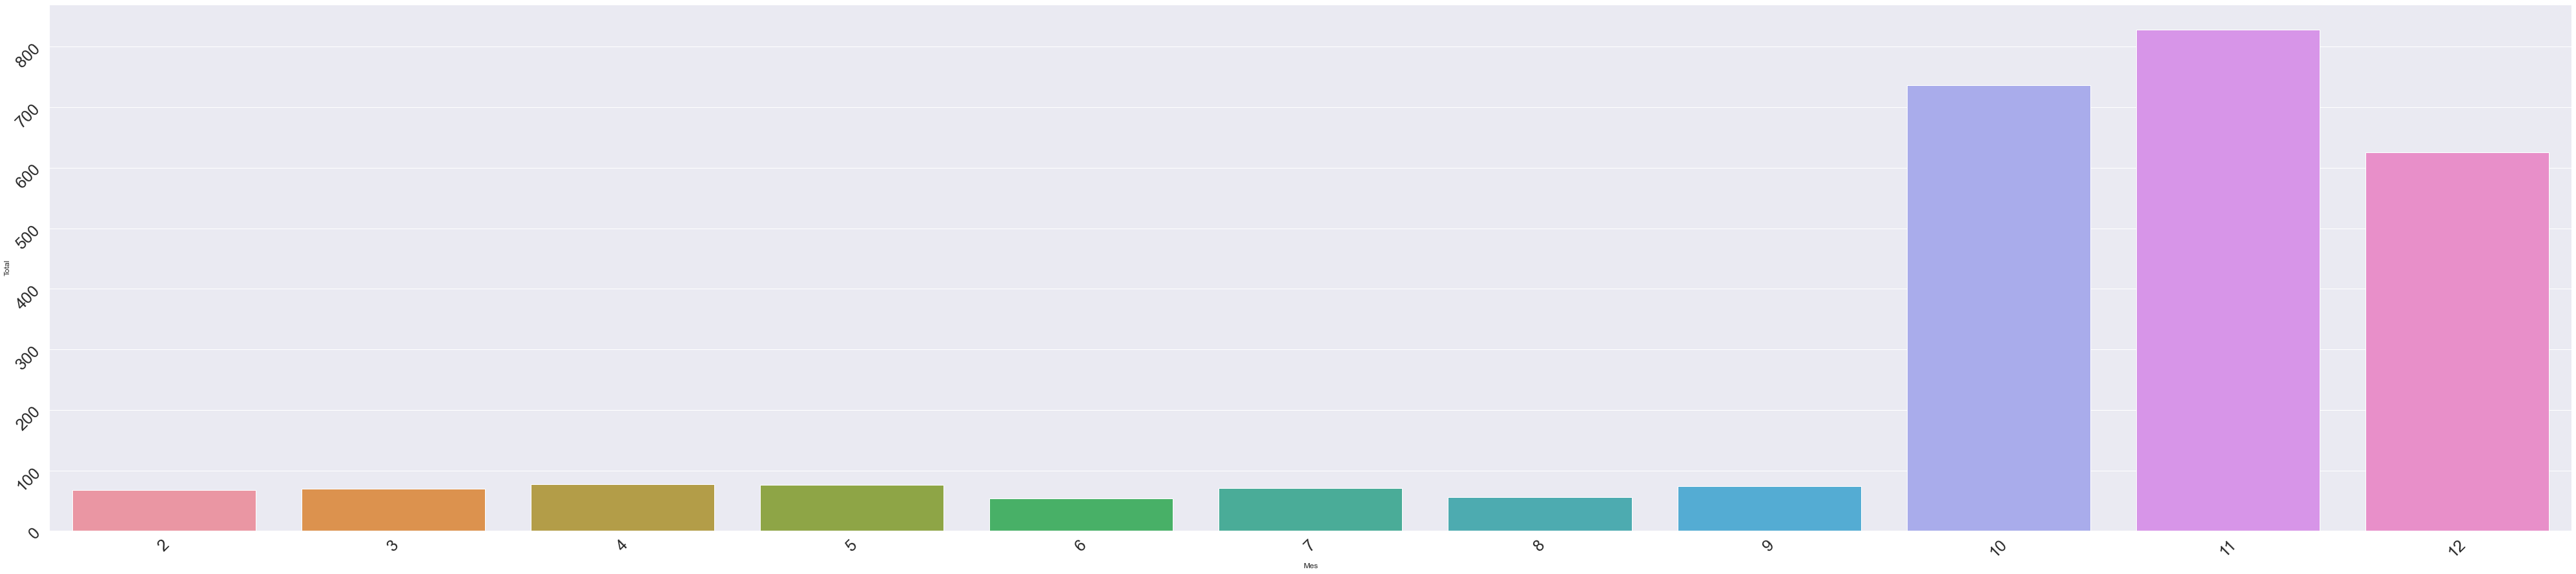

In [118]:
Venta["Mes"]=pd.DatetimeIndex(Venta['Fecha']).month
Compra_SO= outliers(Compra, "Total")
Venta_SO= outliers(Venta, "Total")
Margen=(((Venta_SO.groupby(["Mes"]).sum())/(Compra_SO.groupby(["Fecha_Mes"]).sum())-1)*100)
Margen_20=Margen[Margen["Total"]>20].sort_values(by="Total",ascending=False)
sns.set(rc = {'figure.figsize':(70,15)})
sns.barplot(x = Margen_20.index, y = 'Total', data = Margen_20)
plt.xticks(fontsize=25, rotation=45)
plt.yticks(fontsize=25, rotation=45)
plt.show()

### Conclusiones
Analizando los KPIs obtenidos de "Margen de Ganancia por Producto" y "Margen de Ganancia por Mes". Obtenemos dos graficos muy distintos cuando decidimos considerar o no los outliers. La principal diferencia la observamos en el margen por producto. Donde la cantidad de productos que superan el 100% de ganancia es muchisimo mayor cuando consideramos los productos con outliers en el valor total de Ventas y Compras.
Para los KPIs de Margen sobre mes, observamos un gran incremento para los meses finales del año, decreciendo un poco en diciembre. Un dato curioso ya que por las fiestas se supondria que habria un incremento de las mismas.